In [126]:
# import the library we need

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Prepare data and visualize.

In [127]:
X = pd.read_csv('/content/sample_data/mnist_train_small.csv')
X = X.to_numpy()

y = X[:,0]
X = X[:,1:]

labels = np.unique(y)
X.shape , y.shape

((19999, 784), (19999,))

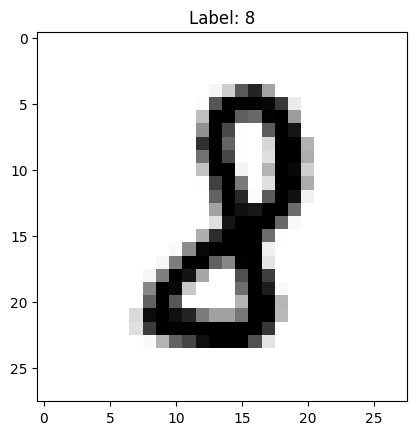

In [128]:
import random
random_num  = random.randint(0,len(X))
plt.imshow(X[random_num,:].reshape(28,28), cmap=plt.cm.binary)
plt.title('Label: '+str(y[random_num]))
plt.show()

# Separate test and train data

In [129]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Normilize data

In [130]:
X_train = X_train / 255.0
X_test = X_test / 255.0

## Create a model for train and test data with tensorflow
1. Define model shape
2. Set optimizers and loss function and metrics
3. Fit the model and check result

In [147]:
# set random seed
tf.random.set_seed(42)

# create a model using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu'),

    tf.keras.layers.Dense(32, activation='relu'),

    tf.keras.layers.Dense(10, activation='softmax')
])

# set optimizer, loss function and metrics
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'])

# what clalbacks we want?
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=4)

history = model.fit(X_train, y_train , epochs=10, callbacks=[early_stopping])

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6980 - loss: 1.0173
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9154 - loss: 0.2925
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9304 - loss: 0.2350
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9417 - loss: 0.1994
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9504 - loss: 0.1715
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9572 - loss: 0.1496
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9631 - loss: 0.1305
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9689 - loss: 0.1135
Epoch 9/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9729 - loss: 0.0985
Epoch 10/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9763 - loss: 0.0855


## Let's plotting our accuracy and loss value

Text(0.5, 0, 'epochs')

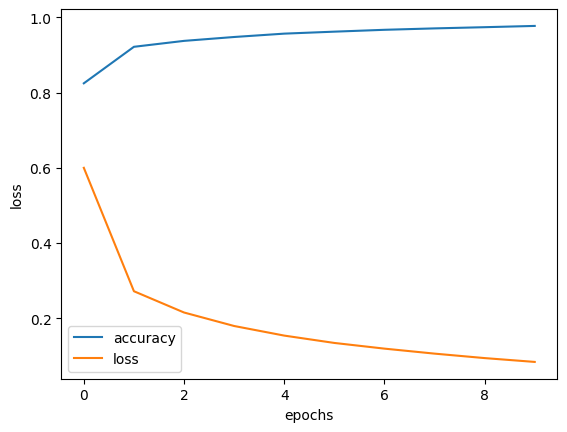

In [132]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

## How about Confusion Matrix??😁

In [133]:
y_prob = model.predict(X_test)
y_pred = np.argmax(y_prob, axis=1)
y_pred , y_test

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


(array([7, 7, 0, ..., 6, 3, 8]), array([7, 7, 0, ..., 6, 3, 8]))

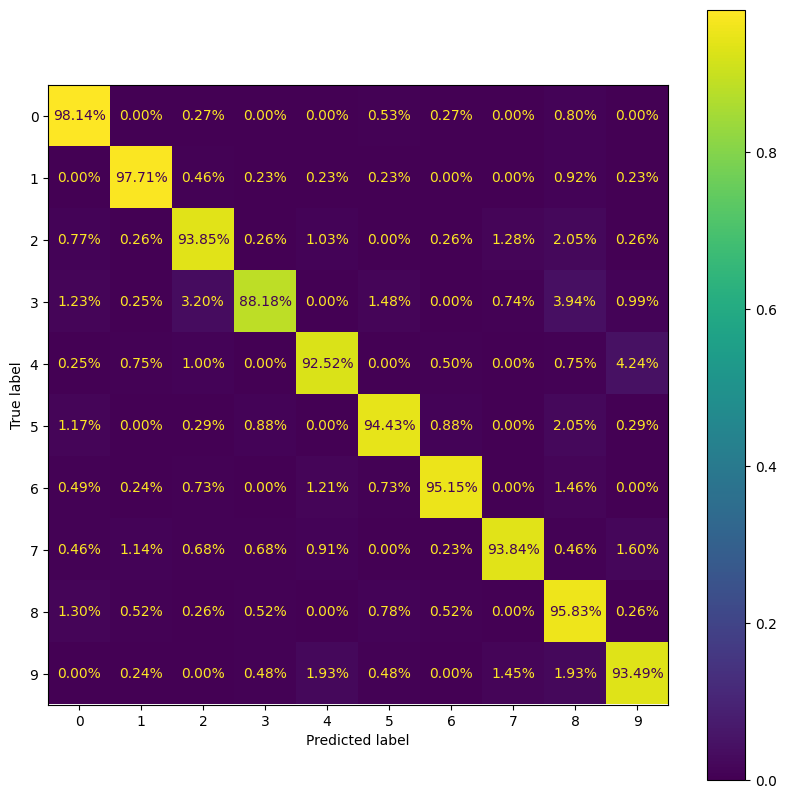

In [135]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

fig ,ax = plt.subplots(figsize=(10,10))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true',ax = ax,
                                        values_format='.2%',)
plt.show()

## Final State: Let's visualize our model's output and evaluate its performance.😉😉

In [138]:
predictions = model.predict(X_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [139]:
predictions[0]

array([7.3320844e-05, 1.4901497e-02, 1.2237395e-02, 1.1535973e-03,
       1.1545943e-05, 3.4113491e-05, 2.5054510e-06, 9.7067672e-01,
       2.1303068e-04, 6.9626735e-04], dtype=float32)

In [140]:
np.argmax(predictions[0]) , y_test[0]

(7, 7)

In [141]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i].reshape((28,28))
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(labels[predicted_label],
                                100*np.max(predictions_array),
                                labels[true_label]),
                                color=color)

In [142]:
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

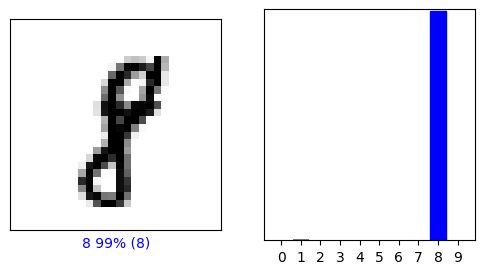

In [143]:
i = 124
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

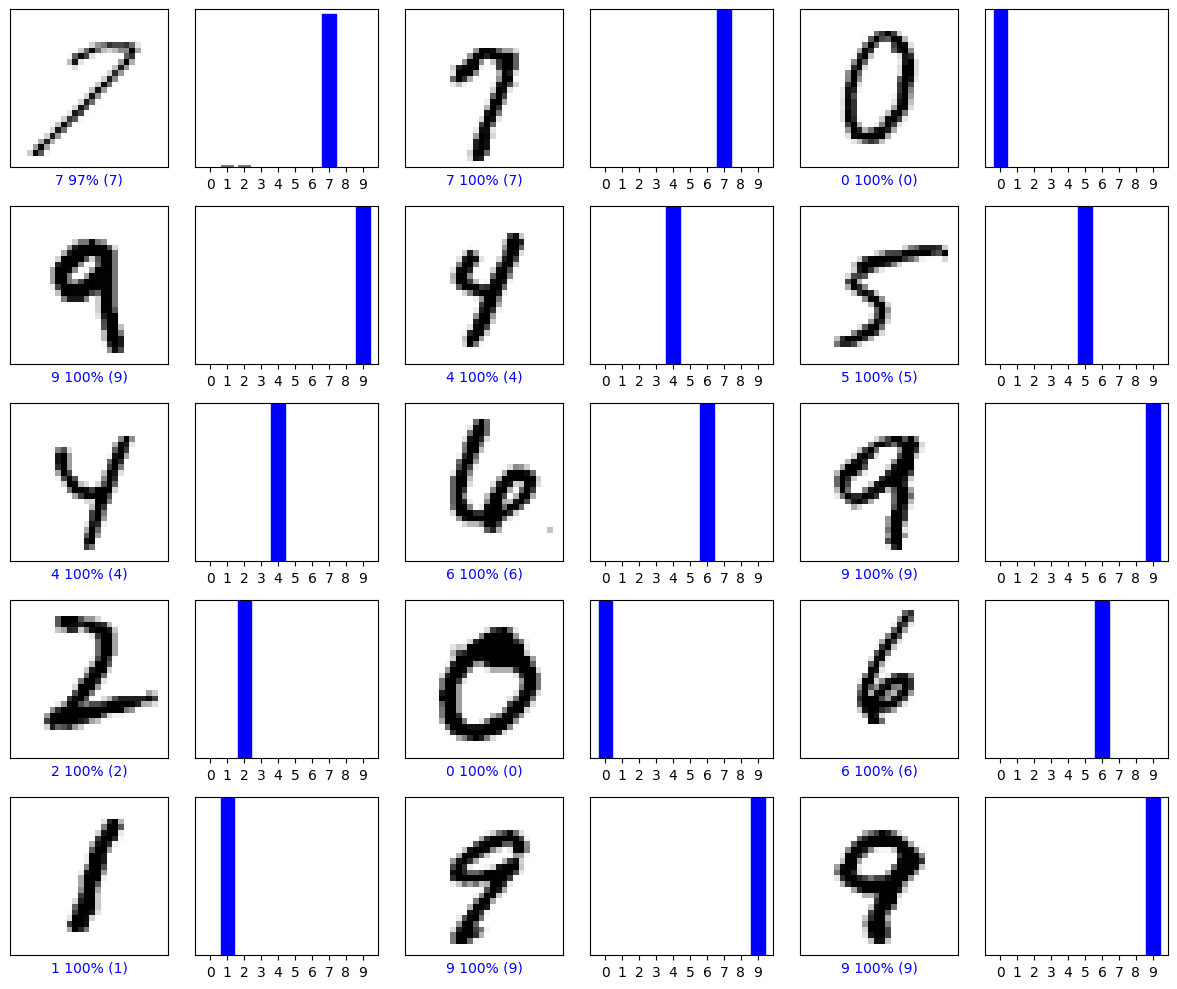

In [144]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

### Finishhhhhhh✌✌